In [1]:
from truthnet import truthnet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
Tr=truthnet()

In [3]:
## load data and infer qnet
features,samples = Tr.load_data(datapath="data/PTSD_cognet_test_processed.csv")
Tr.fit(fit=False,modelpath="results/PTSD_cognet_test.joblib")

In [4]:
Tr.dissonance(outfile="mpi_tmp/PTSD_dissonance_matrix.csv",processes=11)

The number of selected samples (304) is equal to the number of samples (304)!


In [5]:
Tr.generateRandomResponse(n=300,processes=11,mode='uniform',alpha=0.05)

In [6]:
print(Tr.cithreshold)

{0.05: 0.36889239121427014}


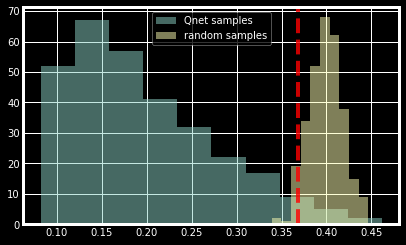

In [8]:
plt.figure()
plt.style.use('dark_background')
dissonance = pd.DataFrame(data=Tr.dissonance.mean(axis=1), columns=["Qnet"])
dissonance["random"] = Tr.urandom_dissonance_df.mean(axis=1)
plt.hist(dissonance["Qnet"], alpha=0.5, label="Qnet samples")
plt.hist(dissonance["random"], alpha=0.5, label="random samples")
plt.legend()
#plt.axvline(Tr.cithreshold[0.01], color="yellow", linestyle="--", alpha=.8)
plt.axvline(Tr.cithreshold[0.05], color="red", linestyle="--", alpha=.8)

In [9]:
Tr.getSuspects(alpha=.01,datapath='data/PTSD_cognet_test.csv',append=False)

,record_id,PTSDDx,ptsd1,ptsd2,ptsd3,ptsd4,ptsd5,ptsd6,ptsd7,ptsd8,...,ptsd205,ptsd206,ptsd207,ptsd208,ptsd209,ptsd210,ptsd211,mdissonance,mode,alpha
9,CAT1010,1,4,1,2,1,3,5,3,5,...,4,5,3,5,5,5,5,0.369462,uniform,0.01
60,CAT1061,1,5,4,5,1,4,5,5,5,...,5,3,2,5,5,5,5,0.419398,uniform,0.01
63,CAT1064,1,5,3,5,3,1,5,5,5,...,5,5,5,5,5,5,5,0.390101,uniform,0.01
86,CAT1087,1,5,2,5,3,3,5,3,5,...,3,5,4,5,5,5,5,0.369530,uniform,0.01
98,CAT1099,1,3,2,1,1,1,3,4,4,...,4,4,4,5,5,5,4,0.402023,uniform,0.01
159,CAT1160,1,4,2,2,2,3,4,3,4,...,4,5,2,5,5,5,5,0.373479,uniform,0.01
188,CAT1189,1,4,1,3,3,4,3,4,4,...,4,3,2,5,5,2,5,0.382831,uniform,0.01
210,CAT1211,0,4,2,2,3,2,4,3,3,...,5,5,4,4,4,5,5,0.410215,uniform,0.01
221,CAT1222,1,4,2,2,3,3,4,3,5,...,5,5,5,5,5,5,5,0.386804,uniform,0.01
222,CAT1223,0,4,1,1,1,1,5,1,5,...,5,5,3,2,2,5,3,0.371270,uniform,0.01


In [ ]:
Tr.getSuspects(alpha=.05,datapath='data/PTSD_cognet_test.csv',mode='null')

QUEUEING TASKS | :   0%|          | 0/304 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/304 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/304 [00:00<?, ?it/s]

In [ ]:
Tr.suspects[Tr.suspects['mode']=='null'].PTSDDx.hist()

In [ ]:
Tr.cithreshold